In [1]:
import pandas as pd


df = pd.read_csv("data/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [2]:
df.sort_values(by="Date", inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


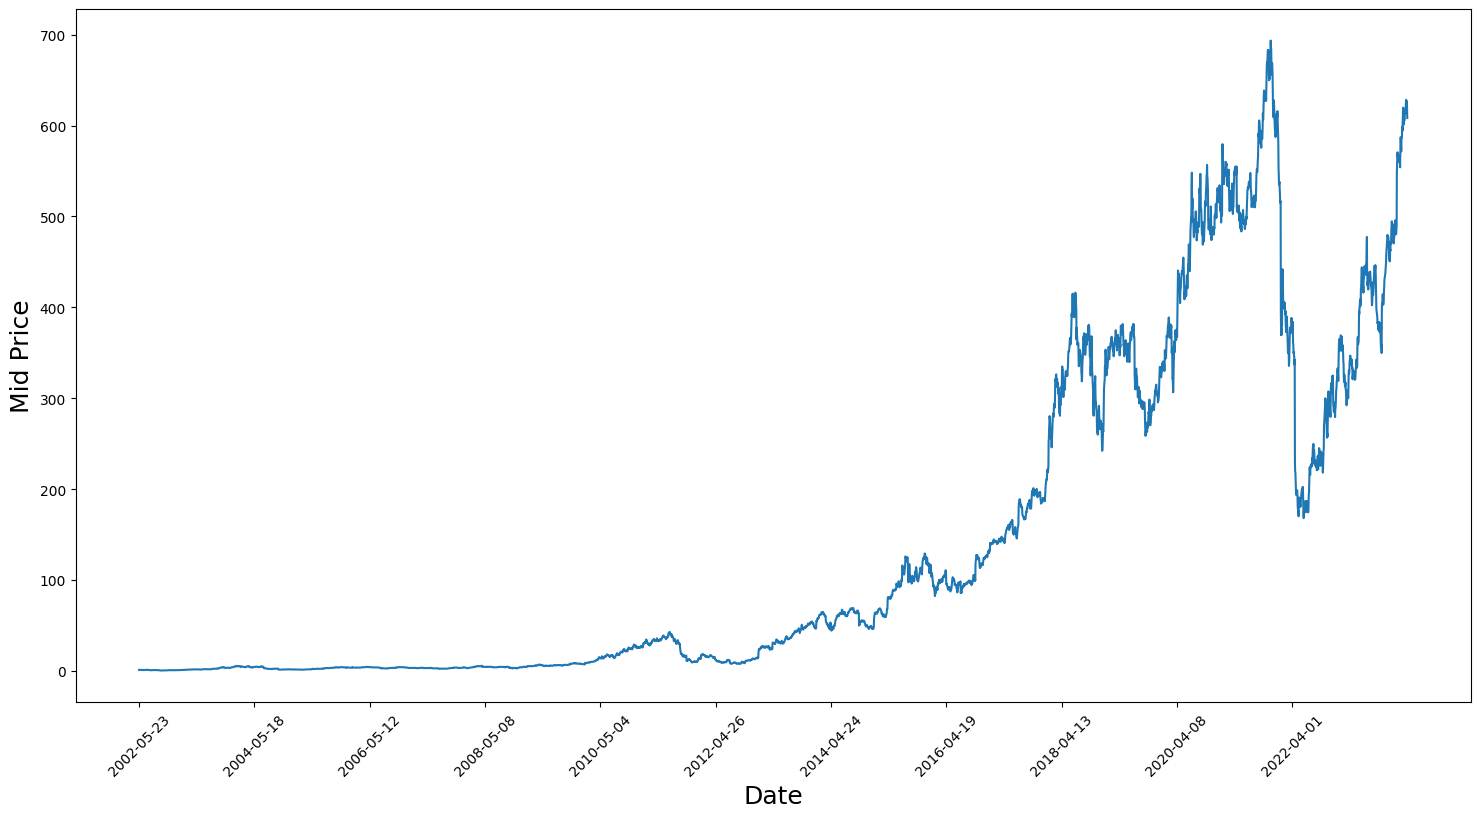

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [4]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High']
low_prices = df.loc[:,'Low']
mid_prices = (high_prices + low_prices) / 2.0

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(mid_prices.values, test_size=0.2, shuffle=False)
print(train_data.shape, test_data.shape)

train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
print(train_data.shape, test_data.shape)

(4400,) (1100,)
(4400, 1) (1100, 1)


In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Scale the data to be between 0 and 1
scaler = MinMaxScaler()

train_data_norm = np.zeros_like(train_data)
window_size = 500
for i in range(0, train_data.size, window_size):
    window = train_data[i:i + window_size, :]
    scaler.fit(window)
    window_norm = scaler.transform(window)

    # plt.figure(figsize = (18,9))
    # plt.subplot(2, 1, 1)
    # plt.plot(range(window.shape[0]), window)
    # plt.subplot(2, 1, 2)
    # plt.plot(range(window_norm.shape[0]), window_norm)
    
    train_data_norm[i:i + window_size, :] = window_norm

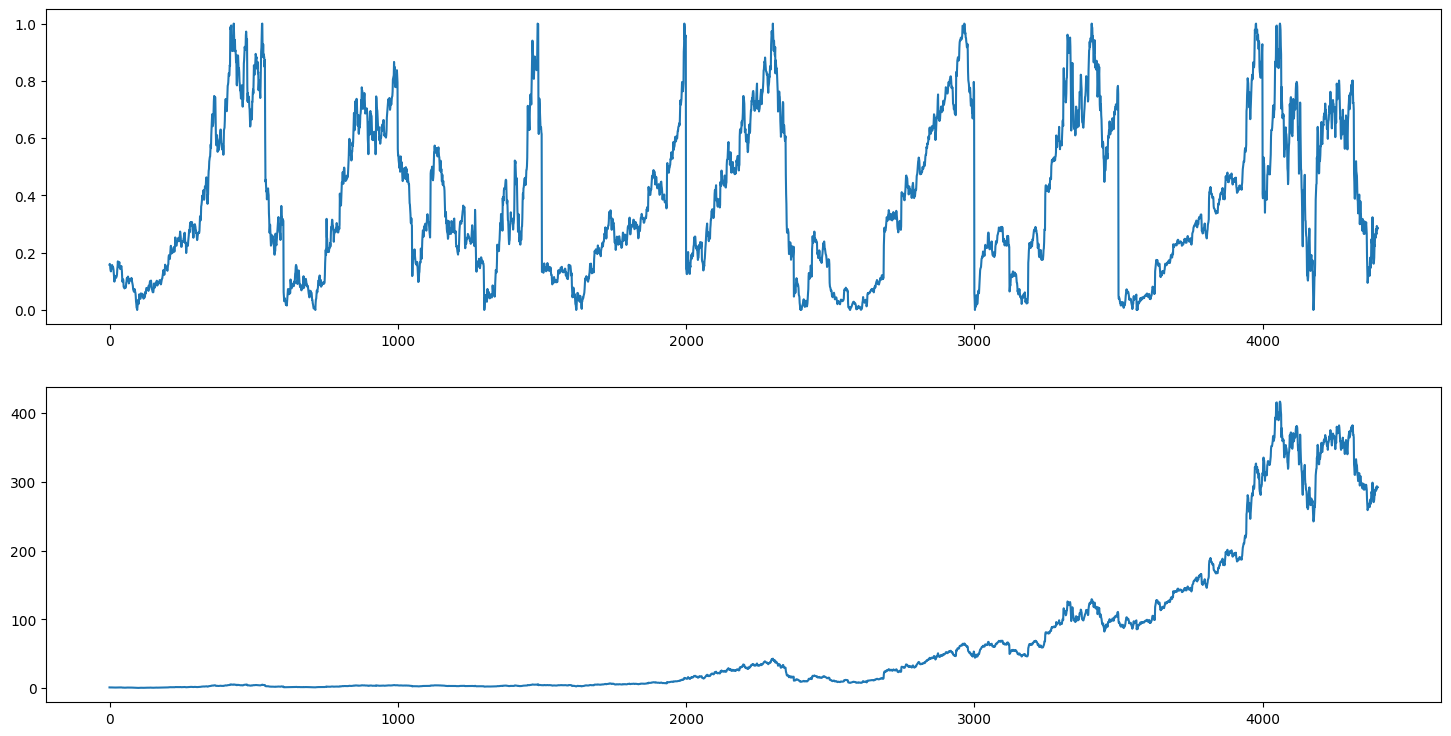

In [7]:
plt.figure(figsize = (18,9))
plt.subplot(2, 1, 1)
plt.plot(range(train_data_norm.shape[0]), train_data_norm)
plt.subplot(2, 1, 2)
plt.plot(range(train_data.shape[0]), train_data)

In [8]:
train_data = train_data.reshape(-1)
train_data_norm = train_data_norm.reshape(-1)

test_data_norm = scaler.transform(test_data).reshape(-1)

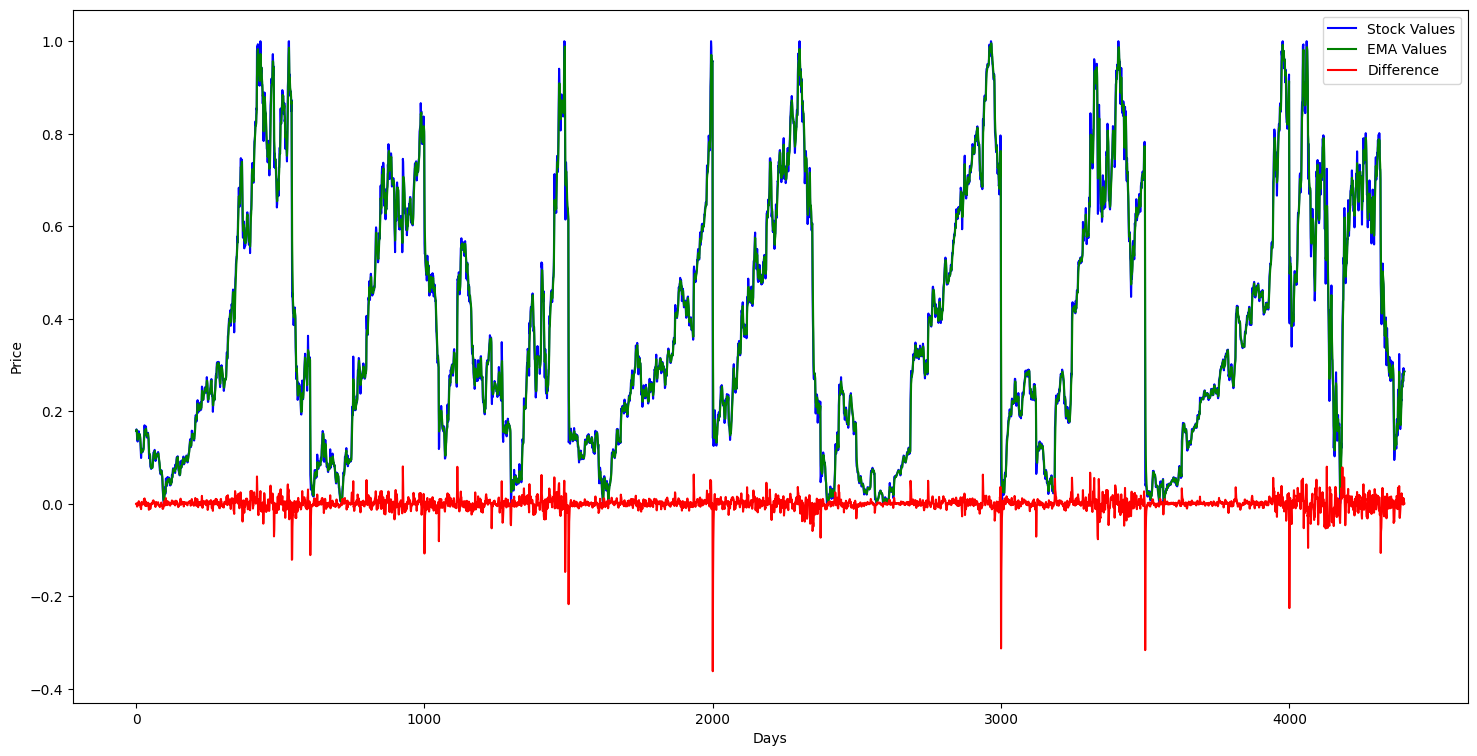

In [9]:
train_data_norm_df = pd.DataFrame(train_data_norm)
test_data_norm_df = pd.DataFrame(test_data_norm)

train_data_smoothed_df = train_data_norm_df.ewm(com=0.8).mean()

plt.figure(figsize = (18,9))
plt.plot(train_data_norm_df, label="Stock Values", color="blue")
plt.plot(train_data_smoothed_df, label="EMA Values", color="green")
plt.plot(train_data_norm_df - train_data_smoothed_df, label="Difference", color="red")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [17]:
import datetime as dt


window_size = 30
N = train_data_norm.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data_smoothed_df.values[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data_smoothed_df.values[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))


MSE error for standard averaging: 0.00632


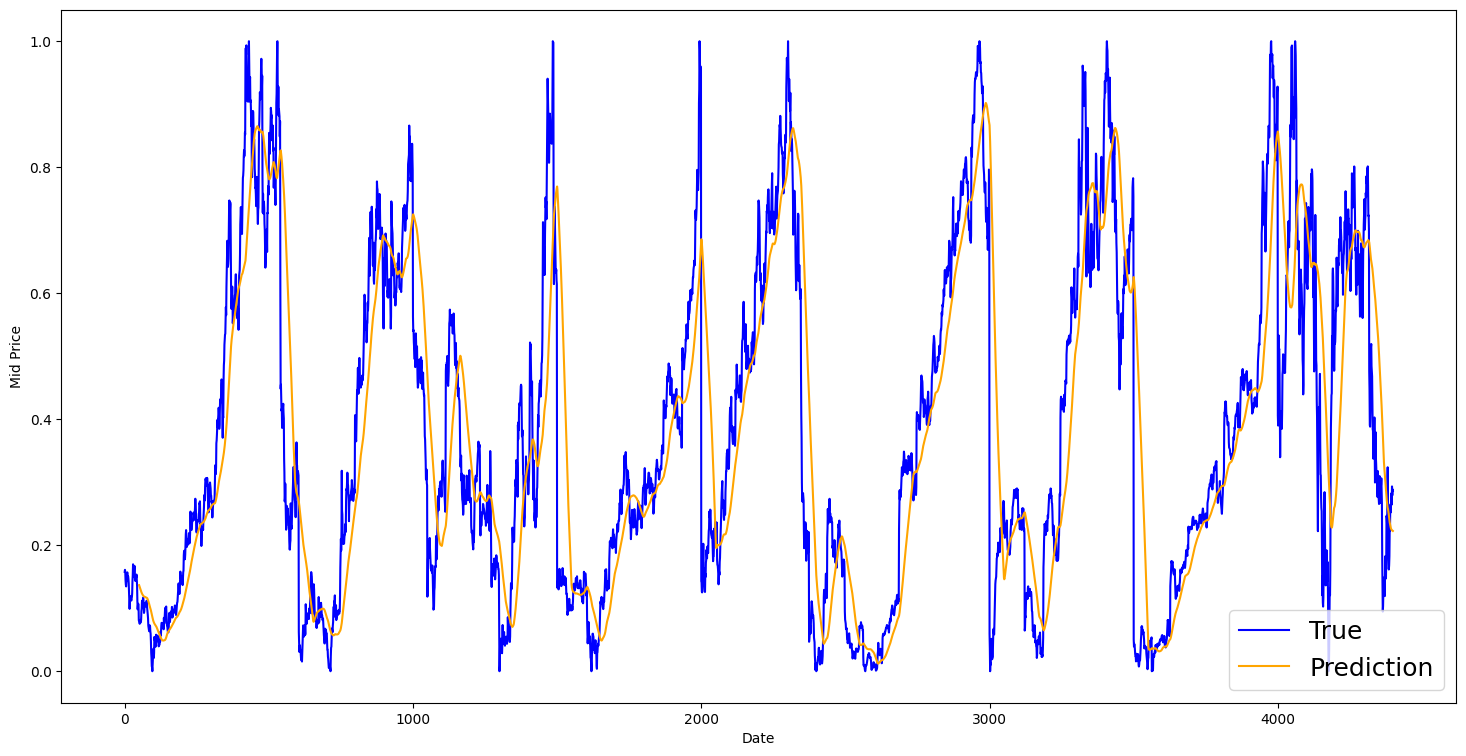

In [16]:

plt.figure(figsize = (18,9))
plt.plot(train_data_norm_df, color='b', label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()
